In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
%matplotlib inline
import warnings
import math


df = pd.read_csv('Sales.csv')
df

# check for missing values
#df.isna().values.any()

#check for duplicates
df.duplicated().values.any()

df.duplicated().sum()

df.duplicated()

df = df.drop_duplicates()
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [40]:
df['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Day               112036 non-null  int64 
 2   Month             112036 non-null  object
 3   Year              112036 non-null  int64 
 4   Customer_Age      112036 non-null  int64 
 5   Age_Group         112036 non-null  object
 6   Customer_Gender   112036 non-null  object
 7   Country           112036 non-null  object
 8   State             112036 non-null  object
 9   Product_Category  112036 non-null  object
 10  Sub_Category      112036 non-null  object
 11  Product           112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Profit            112036 non-null  int64 
 16  Cost              112036 non-null  int

In [42]:
#identifying and cleaning the dataset
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [43]:
df['Unit_Cost'].describe()

count    112036.000000
mean        267.819603
std         550.218722
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

<AxesSubplot:>

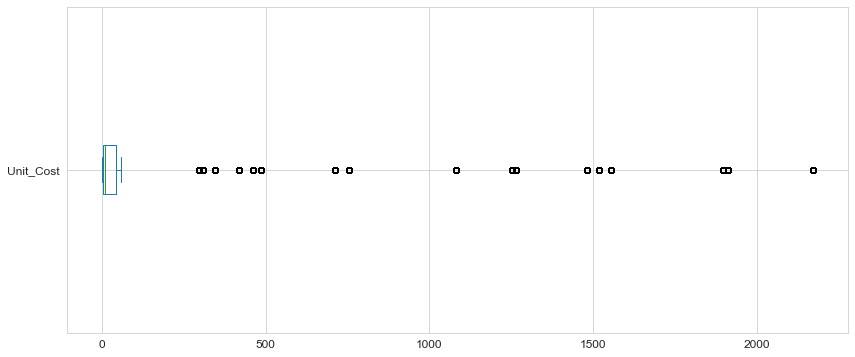

In [44]:
df['Unit_Cost'].plot(kind="box",figsize=(14,6),vert=False, fontsize=12)

Text(0.5, 0, 'Unit Cost')

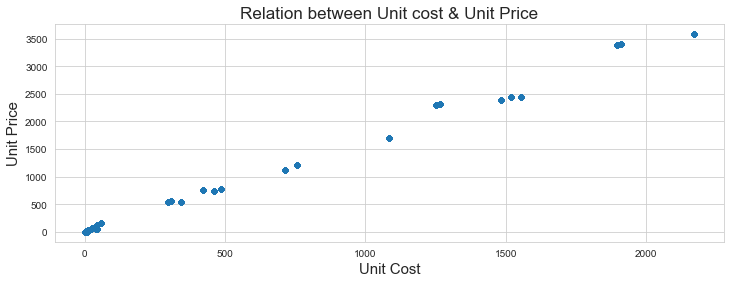

In [45]:
df.plot(kind='scatter',x="Unit_Cost", y="Unit_Price",figsize=(12,4),fontsize=10)
plt.title("Relation between Unit cost & Unit Price",fontsize=17)
plt.ylabel("Unit Price",fontsize=15)
plt.xlabel("Unit Cost",fontsize=15)

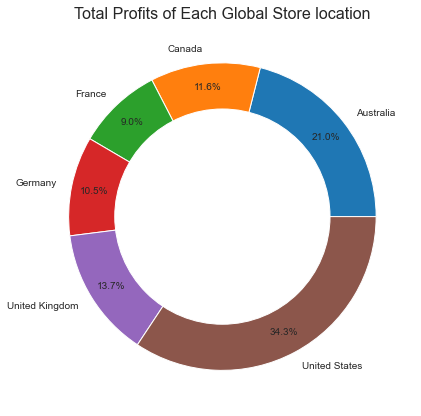

In [46]:
# A donut chart to visualize profit by each location
df.groupby(['Country', 'Customer_Gender'])['Revenue'].sum()
df_pie = df.groupby(['Country'])['Profit'].sum()
df_pie
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
label = ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']
plt.pie(df_pie, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Total Profits of Each Global Store location",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder object and fit it to the 'Product_Category' column
le = LabelEncoder()
df['Product_Category'] = le.fit_transform(df['Product_Category'])

# Select the columns that you want to use for clustering
X = df[['Country', 'Customer_Age', 'Product_Category']]

# Create the KMeans model and fit the data
model = KMeans(n_clusters=5)
model.fit(X)

# Predict the clusters for each data point
clusters = model.predict(X)

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

# Examine the results
print(df.groupby('cluster').mean())


               Day         Year  Customer_Age   Country  Product_Category  \
cluster                                                                     
0        15.852482  2014.317250     22.832599  2.641601          0.507556   
1        15.406948  2014.459553     48.665881  3.000372          0.514578   
2        15.717428  2014.401746     31.920765  2.686165          0.564136   
3        15.530576  2014.477218     58.707314  3.138609          0.489209   
4        15.596408  2014.429099     40.296154  3.035963          0.540679   

         Order_Quantity   Unit_Cost  Unit_Price      Profit        Cost  \
cluster                                                                   
0             11.829576  246.387568  417.060814  263.345363  444.484360   
1             12.205645  237.721712  404.383375  273.582816  430.476551   
2             11.680176  289.744885  489.961152  294.293683  499.554088   
3             12.865588  181.449041  310.781894  252.052758  363.778417   
4         

In [49]:

# Group the data by 'Country' and calculate the mean sales for each group
mean_sales_by_country = df.groupby('Country')['Sales'].mean()

# Extract the values for the x-axis and y-axis
x = mean_sales_by_country.index
y = mean_sales_by_country.values

# Create the bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Country')

# Show the plot
plt.show()


KeyError: 'Column not found: Sales'